In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

In [2]:
data = pd.read_csv("amazon_reviews.txt", delimiter = "\t")

In [3]:
data.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,__label1__,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,__label1__,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,__label1__,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,__label1__,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,__label1__,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


In [4]:
data.loc[data["LABEL"] == "__label1__", "LABEL"] = '1'
data.loc[data["LABEL"] == "__label2__", "LABEL"] = '0'

In [5]:
len(data)

21000

In [6]:
cnt_srs=data.groupby(data["LABEL"]).PRODUCT_CATEGORY.value_counts()
cnt_srs

LABEL  PRODUCT_CATEGORY      
0      Apparel                   350
       Automotive                350
       Baby                      350
       Beauty                    350
       Books                     350
       Camera                    350
       Electronics               350
       Furniture                 350
       Grocery                   350
       Health & Personal Care    350
       Home                      350
       Home Entertainment        350
       Home Improvement          350
       Jewelry                   350
       Kitchen                   350
       Lawn and Garden           350
       Luggage                   350
       Musical Instruments       350
       Office Products           350
       Outdoors                  350
       PC                        350
       Pet Products              350
       Shoes                     350
       Sports                    350
       Tools                     350
       Toys                      350
       V

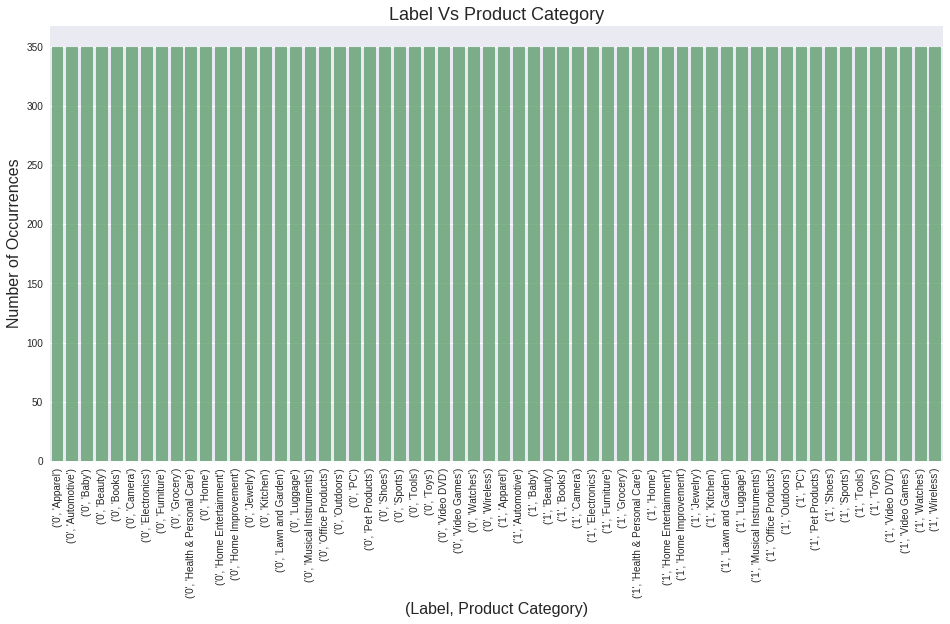

In [7]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Product Category)', fontsize=16)
plt.title('Label Vs Product Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [8]:
cnt_srs = data.groupby(data["LABEL"]).RATING.value_counts()
cnt_srs

LABEL  RATING
0      5         6151
       4         1974
       3          942
       1          868
       2          565
1      5         6059
       4         1999
       3          926
       1          889
       2          627
Name: RATING, dtype: int64

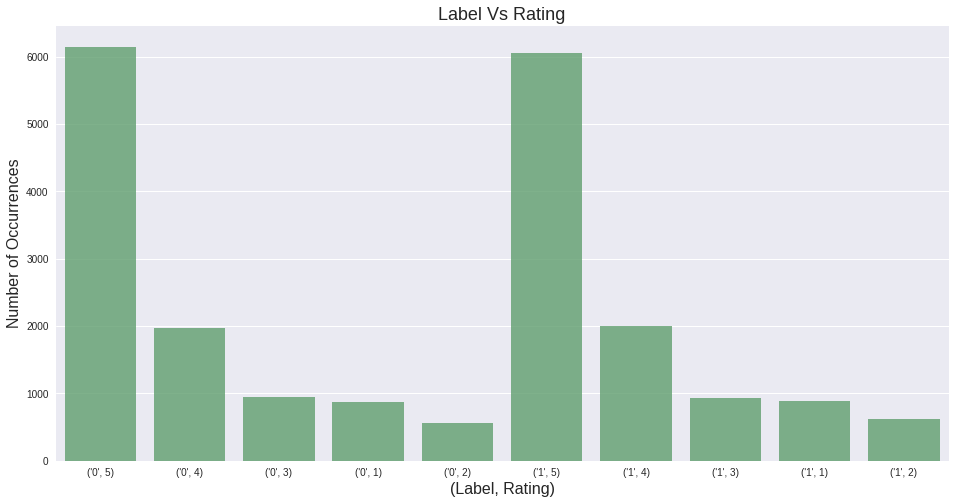

In [9]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Label, Rating)', fontsize=16)
plt.title('Label Vs Rating', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [10]:
cnt_srs = data.groupby(data["RATING"]).PRODUCT_CATEGORY.value_counts()


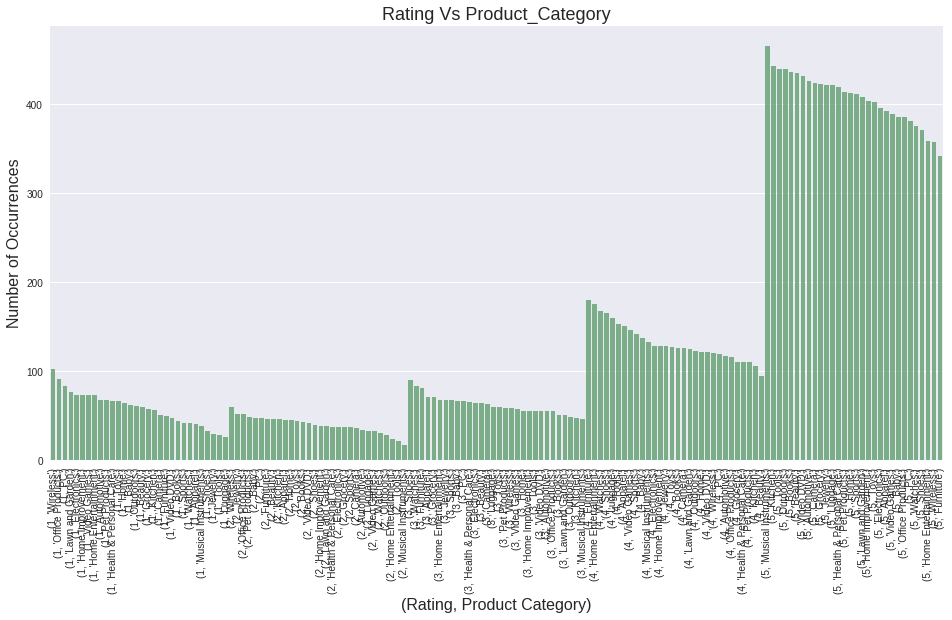

In [11]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Rating, Product Category)', fontsize=16)
plt.title('Rating Vs Product_Category', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

In [12]:
cnt_srs = data.groupby("VERIFIED_PURCHASE").LABEL.value_counts()
cnt_srs

VERIFIED_PURCHASE  LABEL
N                  1        7623
                   0        1679
Y                  0        8821
                   1        2877
Name: LABEL, dtype: int64

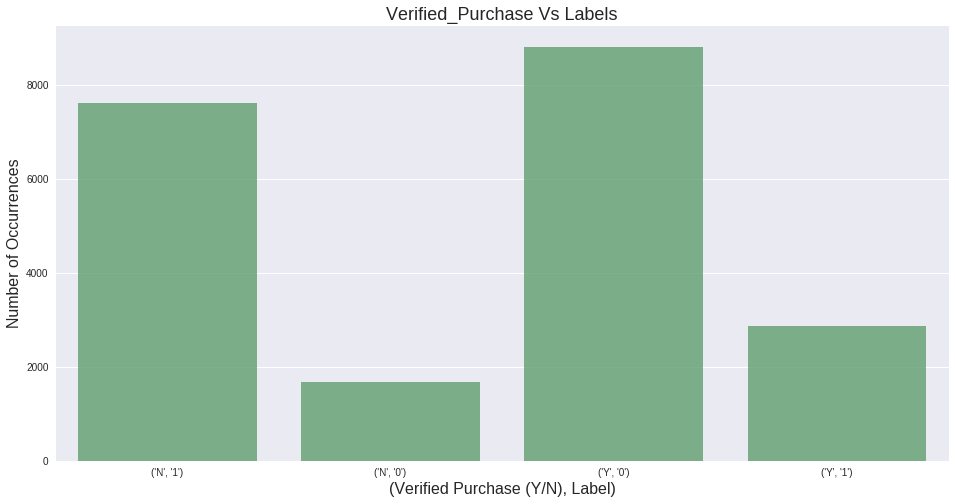

In [13]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('(Verified Purchase (Y/N), Label)', fontsize=16)
plt.title('Verified_Purchase Vs Labels', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [14]:
df1 = data.groupby("LABEL").REVIEW_TEXT

In [15]:
data['TEXT_LENGTH'] = data['REVIEW_TEXT'].apply(len)


In [16]:
cnt_srs = data.groupby(["LABEL"]).TEXT_LENGTH.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    428.102857
1    316.550000
Name: TEXT_LENGTH, dtype: float64

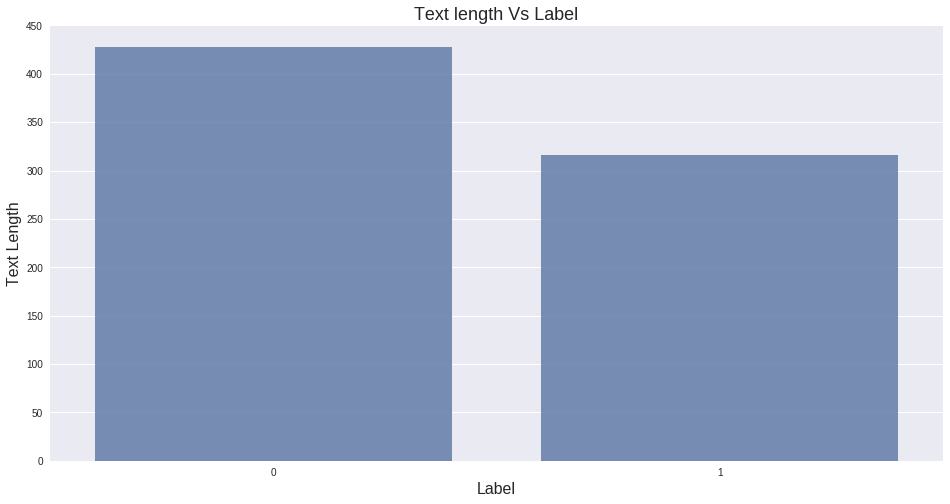

In [17]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Text Length', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Text length Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [18]:
data['num_sentences'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('.')))
#data['num_syllable'] = data['REVIEW_TEXT'].apply(lambda x: len(str(x).split('')))

In [19]:
data

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences
0,1,1,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav...",116,3
1,2,1,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...,404,4
2,3,1,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...,248,6
3,4,1,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...,212,5
4,5,1,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...,331,4
5,6,1,3,N,Health & Personal Care,B00686HNUK,Tobacco Pipe Stand - Fold-away Portable - Ligh...,not sure,I'm not sure what this is supposed to be but I...,188,2
6,7,1,4,N,Toys,B00NUG865W,ESPN 2-Piece Table Tennis,PING PONG TABLE GREAT FOR YOUTHS AND FAMILY,Pleased with ping pong table. 11 year old and ...,261,5
7,8,1,4,Y,Beauty,B00QUL8VX6,Abundant Health 25% Vitamin C Serum with Vitam...,Great vitamin C serum,Great vitamin C serum... I really like the oil...,169,6
8,9,1,4,N,Health & Personal Care,B004YHKVCM,PODS Spring Meadow HE Turbo Laundry Detergent ...,wonderful detergent.,I've used tide pods laundry detergent for many...,144,2
9,10,1,1,N,Health & Personal Care,B00H4IBD0M,"Sheer TEST, Best Testosterone Booster Suppleme...",WARNING: do not waste your money on this,Everybody wants to fall for their promises. Bu...,279,5


In [20]:
!pip install textstat

In [21]:
import textstat
#from textstat import flesch_kincaid_grade

In [64]:
from textstat.textstat import textstat
data["FK_Score"] = data["REVIEW_TEXT"].apply(textstat.flesch_kincaid_grade)

In [65]:
cnt_srs = data.groupby(["LABEL"]).FK_Score.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    5.848686
1    5.795600
Name: FK_Score, dtype: float64

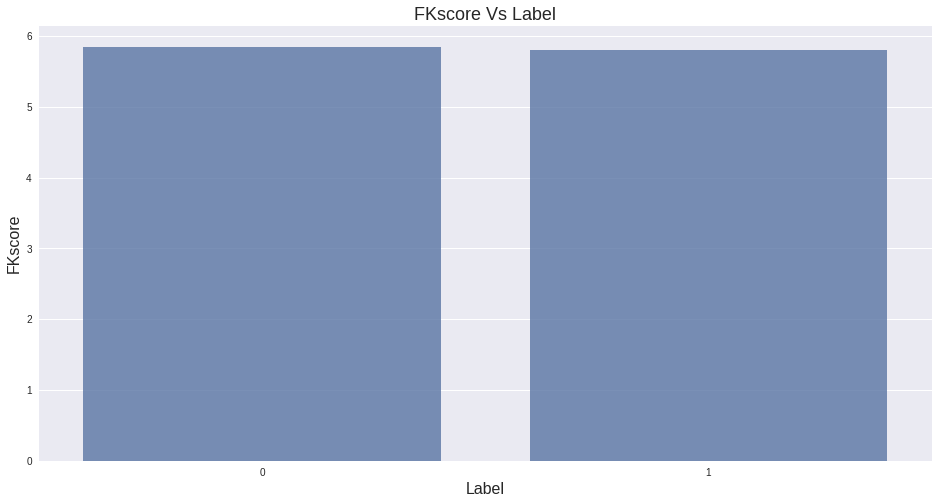

In [66]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('FKscore', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('FKscore Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [28]:
import nltk
wpt = nltk.WordPunctTokenizer()
stop_words = nltk.corpus.stopwords.words('english')

In [29]:
def stopCount(x):
    sum =0
    for char in x.split():
        sum+= char in stop_words
    return sum
data['stop_count'] = data['REVIEW_TEXT'].apply(stopCount)


In [31]:
cnt_srs = data.groupby(["LABEL"]).stop_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    32.519048
1    24.696190
Name: stop_count, dtype: float64

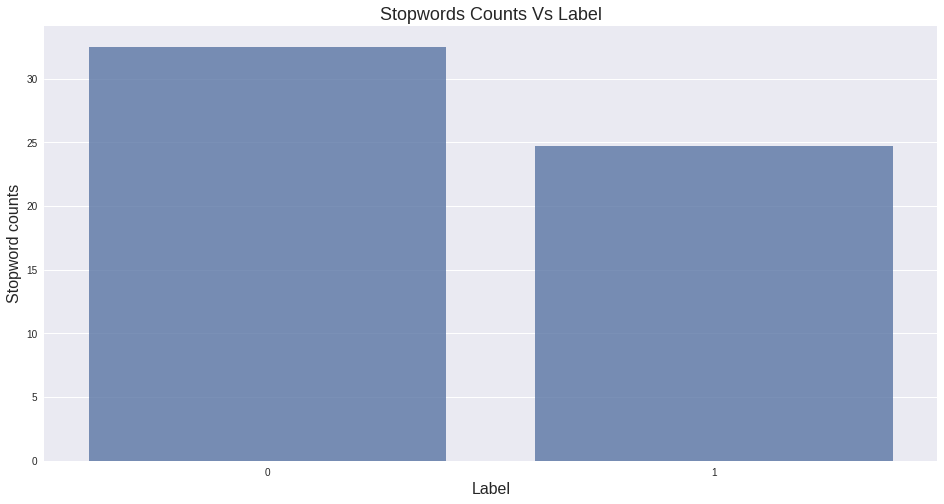

In [32]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Stopword counts', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Stopwords Counts Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [33]:
def capsCount(x):
    sum =0
    for char in x:
        sum+= char in "QWERTYUIOPASDFGHJKLZXCVBNM"
    return sum
data['caps_count'] = data['REVIEW_TEXT'].apply(capsCount)


In [34]:
cnt_srs = data.groupby(["LABEL"]).caps_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    12.099810
1     8.712667
Name: caps_count, dtype: float64

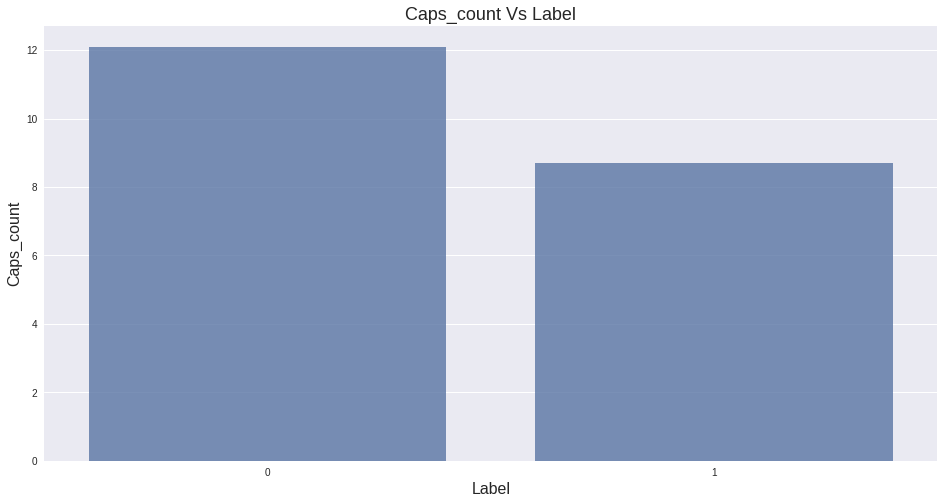

In [35]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Caps_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Caps_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [36]:
import string
count = lambda l1,l2: sum([1 for x in l1 if x in l2])
def punctCount(x):
    return count(x, set(string.punctuation))
data['punct_count'] = data['REVIEW_TEXT'].apply(punctCount)

In [37]:
cnt_srs = data.groupby(["LABEL"]).punct_count.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    15.571524
1    10.182571
Name: punct_count, dtype: float64

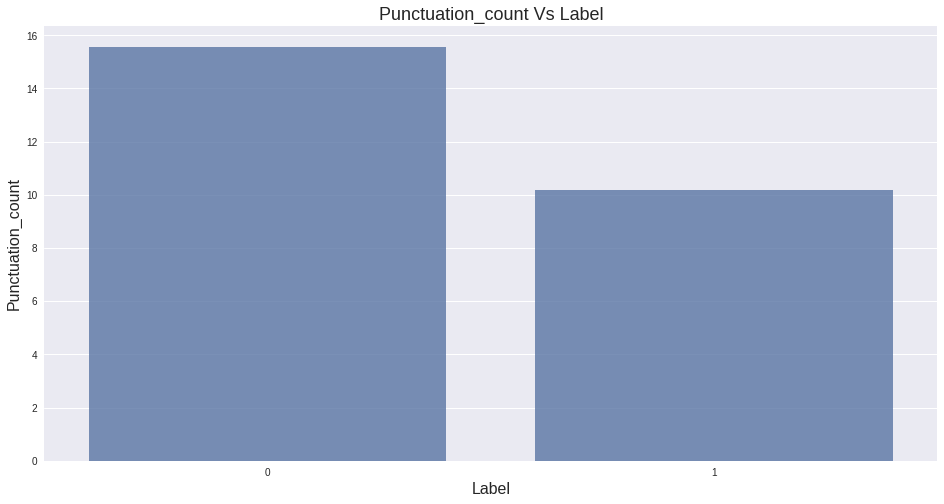

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Punctuation_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Punctuation_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [39]:
import re
import string
match_list = []

def checkName(title,text):
    matches = []
    for word in title.split():
        #removing punctuation
        word = "".join((char for char in word if char not in string.punctuation))
        #print(word)
        myreg = r'\b'+word+r'\b'
        r = re.compile(myreg, flags=re.I | re.X)
        matches.append(r.findall(text))
    return len(matches)
        

for a,b in zip(data.PRODUCT_TITLE, data.REVIEW_TEXT):
    number_of_matches = checkName(a,b)
    match_list.append(number_of_matches)
    
data["matchesDf"] = match_list

In [40]:
cnt_srs = data.groupby(["LABEL"]).matchesDf.agg(lambda x: sum(x)/len(x))
cnt_srs

LABEL
0    10.570667
1    13.823143
Name: matchesDf, dtype: float64

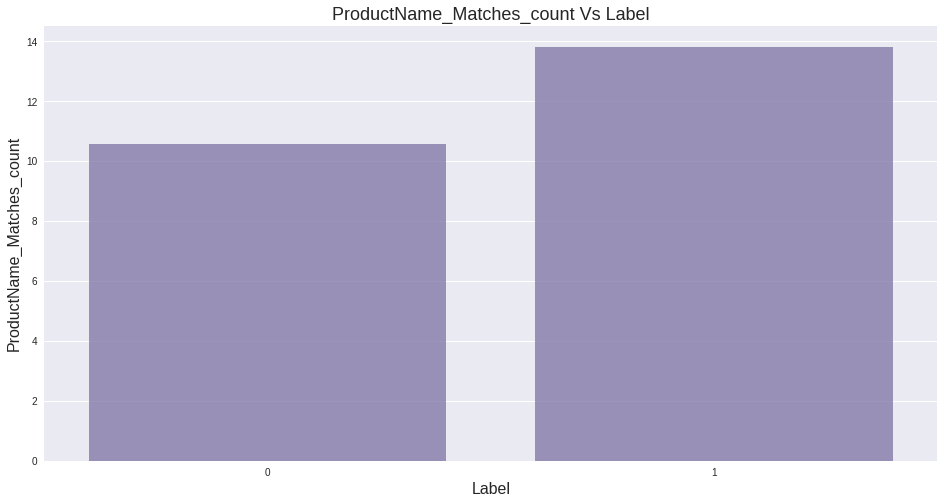

In [41]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('ProductName_Matches_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('ProductName_Matches_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

In [68]:
data["emojis"] = data["REVIEW_TEXT"].apply(lambda x: 1 if ";)" in x.split() or ":)" in x.split() or ":-)" in x.split() else 0)

In [69]:
cnt_srs = data.groupby(["LABEL"]).emojis.agg(lambda x: sum(x))
cnt_srs

LABEL
0    107
1     85
Name: emojis, dtype: int64

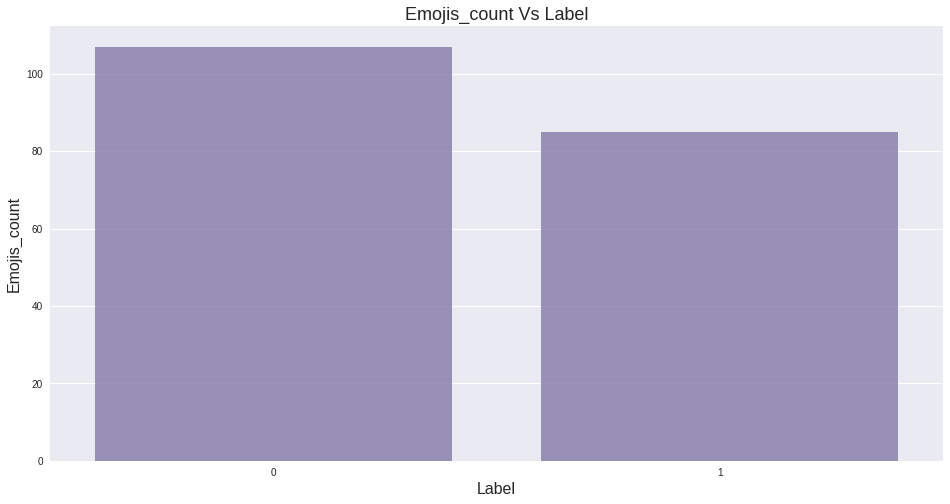

In [70]:
plt.figure(figsize=(16,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.ylabel('Emojis_count', fontsize=16)
plt.xlabel('Label', fontsize=16)
plt.title('Emojis_count Vs Label', fontsize=18)
plt.xticks(rotation='horizontal')
plt.show()

====== SENTIMENT CLASSIFIER ======

In [45]:
#SENTIMENT CLASSIFIER
data.loc[data["RATING"] < 3, "RATING"] = 0
data.loc[data["RATING"] > 3, "RATING"] = 1


In [46]:
data.RATING.value_counts()

1    16183
0     2949
3     1868
Name: RATING, dtype: int64

In [47]:
data1 = data.loc[data['RATING'] == 1]
print(len(data1))
data2 = data1.sample(frac=0.2, replace=True)
print(len(data2))
data3 = data1 = data.loc[data['RATING'] == 0]

16183
3237


In [48]:
data4 = pd.concat([data2, data3], ignore_index=True)
data4

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT,TEXT_LENGTH,num_sentences,char_count,FKscore,stop_count,caps_count,punct_count,matchesDf,emojis
0,17838,0,1,Y,Home Improvement,B00004W3ZQ,Legrand C210 Wiremold Cord Mate II Kit,Wonderful product for running cables without d...,"Works great! I easy to install, just plan ahe...",156,2,123,24.133846,9,3,4,7,0
1,20521,0,1,Y,Video Games,B0052J8GF0,Zumba Fitness 2 - Nintendo Wii,Quite a Workout,I bought this as a way to get myself to exerc...,678,10,524,19.971764,66,29,13,6,0
2,667,1,1,N,PC,B003QH2MY6,Kinobo Wireless Slimline USB Mouse For Laptops...,Not bad,"Decent, have had pretty good tracking with thi...",117,3,92,8.898632,8,2,5,12,0
3,11333,0,1,N,Sports,B008EQ1LMS,Elixir Golf Sun Protection Arm Cooling Sleeve-...,Low cost. Works fairly well.,Low cost. Very stretchy. They block sun well...,1155,20,830,15.412154,88,21,74,9,0
4,8056,1,1,N,Luggage,B009I3OV8C,"Samsonite Luggage NYC Cityscapes Spinner 28, B...",complete & Strong & Trust-worthy & Fashionable,"Complete: unlike other luggage bags, this lugg...",471,6,363,24.119268,36,8,31,10,0
5,6246,1,1,Y,Home,B0020PECKM,UnCommon Artistry® Rubber Petal Style Earring ...,Five stars,"The earrings security support is transparent ,...",167,1,129,58.654970,11,1,6,7,0
6,1302,1,1,N,Electronics,B005B51KMQ,Sudebake SB6051 Woode Tuabe wih AM/FM Radio,satisfied,"It functions well, but is what it is; an inexp...",224,4,179,15.679464,15,4,8,7,0
7,10206,1,1,N,Luggage,B000VEKR4Y,"Samsonite 5 Piece Nested Luggage Set, Black",Great value for the money,"For a 110 bucks really cant go wrong, great qu...",271,2,206,46.224742,21,3,7,7,0
8,1656,1,1,N,Grocery,B000GCE2P6,"Johnson's Baby Powder, 1.5 oz",Product works well,"The powder is perfect, my only disappointment ...",112,2,89,15.626786,13,2,2,5,0
9,7027,1,1,N,Home Improvement,B0018P1RTE,Hardware House 543769 Berkshire 14-1/2-Inch by...,enough,It is simple and gives light. the design is go...,197,6,152,6.319569,13,4,8,12,0


In [49]:
import csv                               # csv reader
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
from random import shuffle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/aayush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [50]:
rawData = data4[["REVIEW_TEXT", "RATING"]]
rawData = [tuple(x) for x in rawData.values]


In [51]:
rawData

[('Works great!  I easy to install, just plan ahead how you want to run minimize cosmetics.  The adhesive stays once touches dry wall, will not come off easily',
  1),
 ('I bought this  as a way to get myself to exercise. I am thin and healthy but I HATE working out. This turned out to be much more difficult than I expected. I had hoped that there would be several components that would be easy for anyone and that I could work my way up to the more challenging parts. Well even the so-called warm up just about killed me. I fell like I am too old (61) for this and will never be able to keep up with the intense pace of Zumba. I guess I should have bought a Richard Simmons Sweatin to the Oldies DVD instead. LOL Buy this if you are already pretty fit to add to your arsenal of workouts. If you are old and out of shape, this is too hard for you.',
  1),
 ("Decent, have had pretty good tracking with this.  Wouldn't say it's anything fancy but working is good for the price.",
  1),
 ("Low cost. 

In [52]:
# TEXT PREPROCESSING AND FEATURE VECTORIZATION
# Input: a string of one review
table = str.maketrans({key: None for key in string.punctuation})
def preProcess(text):
    # Should return a list of tokens
    lemmatizer = WordNetLemmatizer()
    filtered_tokens=[]
    lemmatized_tokens = []
    stop_words = set(stopwords.words('english'))
    text = text.translate(table)
    for w in text.split(" "):
        if w not in stop_words:
            lemmatized_tokens.append(lemmatizer.lemmatize(w.lower()))
        filtered_tokens = [' '.join(l) for l in nltk.bigrams(lemmatized_tokens)] + lemmatized_tokens
    return filtered_tokens

In [53]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens):
    localDict = {}
    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
   
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [54]:
def crossValidate(dataset, folds):
    shuffle(dataset)
    cv_results = []
    foldSize = int(len(dataset)/folds)
    for i in range(0,len(dataset),foldSize):
        classifier = trainClassifier(dataset[:i]+dataset[foldSize+i:])
        y_pred = predictLabels(dataset[i:i+foldSize],classifier)
        a = accuracy_score(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred)
        (p,r,f,_) = precision_recall_fscore_support(list(map(lambda d : d[1], dataset[i:i+foldSize])), y_pred, average ='macro')
        #print(a,p,r,f)
        cv_results.append((a,p,r,f))
    cv_results = (np.mean(np.array(cv_results),axis=0))
    return cv_results

In [55]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, Label) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text)),Label))
    for (Text, Label) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text)),Label))

In [56]:
def trainClassifier(trainData):
    print("Training Classifier...")
    pipeline =  Pipeline([('svc', LinearSVC(C=0.01))])
    return SklearnClassifier(pipeline).train(trainData)

In [57]:
def predictLabels(reviewSamples, classifier):
    return classifier.classify_many(map(lambda t: t[0], reviewSamples))

In [58]:
#rawData = []          # the filtered data from the dataset file (should be 21000 samples)
#preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []    

#print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
 #     "Preparing the dataset...",sep='\n')

# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 6186 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 6186 rawData, 4948 trainData, 1238 testData
Training Samples: 
4948
Features: 
179746
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [ 0.87357379  0.87328627  0.87319835  0.87298504]


ADDING EXTRA FEATURES

In [59]:
rawData = data4[["REVIEW_TEXT", "VERIFIED_PURCHASE", "PRODUCT_CATEGORY", "LABEL", "RATING"]]
rawData = [tuple(x) for x in rawData.values]


In [60]:
def splitData(percentage):
    dataSamples = len(rawData)
    halfOfData = int(len(rawData)/2)
    trainingSamples = int((percentage*dataSamples)/2)
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[:trainingSamples] + rawData[halfOfData:halfOfData+trainingSamples]:
        trainData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))
    for (Text, verified_Purchase, product_Category, Label, Rating) in rawData[trainingSamples:halfOfData] + rawData[halfOfData+trainingSamples:]:
        testData.append((toFeatureVector(preProcess(Text), verified_Purchase, product_Category, Label), Rating))

In [61]:
featureDict = {} # A global dictionary of features

def toFeatureVector(tokens, verified_Purchase, product_Category, labels):
    localDict = {}
    
#Labels

    featureDict["L"] = 1   
    localDict["L"] = labels

#Verified_Purchase
  
    featureDict["VP"] = 1
            
    if verified_Purchase == "N":
        localDict["VP"] = 0
    else:
        localDict["VP"] = 1

#Product_Category

    
    if product_Category not in featureDict:
        featureDict[product_Category] = 1
    else:
        featureDict[product_Category] = +1
            
    if product_Category not in localDict:
        localDict[product_Category] = 1
    else:
        localDict[product_Category] = +1
            
            
#Text        

    for token in tokens:
        if token not in featureDict:
            featureDict[token] = 1
        else:
            featureDict[token] = +1
            
        if token not in localDict:
            localDict[token] = 1
        else:
            localDict[token] = +1
    
    return localDict

In [62]:
#rawData = []          # the filtered data from the dataset file (should be 21000 samples)
#preprocessedData = [] # the preprocessed reviews (just to see how your preprocessing is doing)
trainData = []        # the training data as a percentage of the total dataset (currently 80%, or 16800 samples)
testData = []    

#print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
 #     "Preparing the dataset...",sep='\n')

# We split the raw dataset into a set of training data and a set of test data (80/20)
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Preparing training and test data...",sep='\n')
splitData(0.8)
# We print the number of training samples and the number of features
print("Now %d rawData, %d trainData, %d testData" % (len(rawData), len(trainData), len(testData)),
      "Training Samples: ", len(trainData), "Features: ", len(featureDict), sep='\n')
print("Mean of cross-validations (Accuracy, Precision, Recall, Fscore): ", crossValidate(trainData, 10))

Now 6186 rawData, 0 trainData, 0 testData
Preparing training and test data...
Now 6186 rawData, 4948 trainData, 1238 testData
Training Samples: 
4948
Features: 
179778
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Training Classifier...
Mean of cross-validations (Accuracy, Precision, Recall, Fscore):  [ 0.84389952  0.8440097   0.84418765  0.84256997]


In [63]:
classifier = trainClassifier(trainData)
predictions = predictLabels(testData, classifier)
true_labels = list(map(lambda d: d[1], testData))
a = accuracy_score(true_labels, predictions)
p, r, f1, _ = precision_recall_fscore_support(true_labels, predictions, average='macro')
print("accuracy: ", a)
print("Precision: ", p)
print("Recall: ", a)
print("f1-score: ", f1)


Training Classifier...
accuracy:  0.806138933764
Precision:  0.813054281193
Recall:  0.806138933764
f1-score:  0.805062394205
